<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%208/Google%20Colab/Tugas_Lecture_8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 8 SVM pada dataset heart_failure_clinical_records_dataset.csv

# Memuat Library

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings

# Menonaktifkan semua peringatan
warnings.filterwarnings("ignore")

1. **Import Library:** Baris pertama adalah untuk mengimpor library yang diperlukan untuk analisis data dan pembuatan model machine learning. Library yang diimpor antara lain:
  - pandas untuk manipulasi dan analisis data tabular.
  - matplotlib.pyplot untuk membuat visualisasi data.
  - seaborn untuk meningkatkan estetika plot.
  - train_test_split dari sklearn.model_selection untuk membagi dataset menjadi data latih dan data uji.
  - SVC (Support Vector Classifier) dari sklearn.svm untuk membuat model Support Vector Machine (SVM).
  - confusion_matrix, classification_report, dan accuracy_score dari sklearn.metrics untuk mengevaluasi kinerja model.

  2. **Menonaktifkan Peringatan:** Baris kedua warnings.filterwarnings("ignore") digunakan untuk menonaktifkan semua peringatan yang mungkin muncul selama eksekusi kode. Ini berguna untuk memastikan bahwa peringatan yang tidak relevan tidak mengganggu keluaran dari kode.

  Dengan menggunakan library-library ini, kita dapat melakukan analisis data, membagi data menjadi data latih dan data uji, membuat model SVM, dan mengevaluasi kinerjanya tanpa terganggu oleh peringatan yang tidak relevan.

# Menghubungkan GDrive ke GColab

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Kode yang Anda berikan adalah kode untuk menghubungkan Google Colab dengan Google Drive. Ini memungkinkan Anda mengakses file-file yang disimpan di Google Drive Anda langsung dari Google Colab.

Penjelasan singkat tentang kode tersebut:

- from google.colab import drive: Ini mengimpor modul drive dari pustaka google.colab.
- drive.mount('/content/gdrive'): Ini memanggil fungsi mount dari modul drive untuk me-mount Google Drive Anda ke direktori /content/gdrive di Google Colab.

Saat Anda menjalankan kode ini, Google Colab akan meminta Anda untuk masuk ke akun Google Anda dan memberikan kode autentikasi untuk menghubungkan Colab ke Google Drive Anda. Setelah berhasil, Anda dapat mengakses file yang ada di Google Drive Anda melalui path /content/gdrive.

# Memuat dan Menampilkan Data

In [ ]:
#Membaca file CSV yang berisi data ke dalam sebuah DataFrame
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/heart_failure_clinical_records_dataset.csv')

# Tampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
data.head()


5 Baris Pertama Dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Kode di atas membaca file CSV yang berisi data ke dalam sebuah DataFrame menggunakan pd.read_csv(). Data tersebut kemudian ditampilkan lima baris pertama menggunakan metode .head().

- '/content/gdrive/MyDrive/Dataset/heart_failure_clinical_records_dataset.csv' adalah path ke file CSV yang berisi data. Jika menggunakan Google Colab,
- '/content/gdrive/MyDrive/' mengacu pada direktori root dari Google Drive Anda.

Dengan kode ini, Anda membaca data dari file CSV ke dalam variabel data dan menampilkan lima baris pertama dari dataset tersebut.

# Eksplorasi Data

In [ ]:
# Tampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

Kode tersebut digunakan untuk menampilkan informasi tentang dataset menggunakan metode .info() dari Pandas DataFrame.

Output tersebut memberikan informasi berikut tentang dataset:

- Dataset ini memiliki total 299 baris dan 13 kolom.
- Setiap kolom memiliki non-null count, yang menunjukkan jumlah nilai non-null (tidak kosong) dalam kolom tersebut.
- Dtype menunjukkan tipe data dari setiap kolom.
- Informasi tambahan juga diberikan seperti RangeIndex, jumlah memori yang digunakan, serta daftar nama kolom dan jumlah non-null count untuk setiap kolom.

Ini memberikan gambaran yang baik tentang struktur dataset, jenis data dalam setiap kolom, serta apakah terdapat nilai yang hilang (null) dalam dataset. Dalam hal ini, tidak ada nilai yang hilang, karena setiap kolom memiliki jumlah non-null count yang sama dengan jumlah total baris dataset (299).

In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif Dataset:")
data.describe()


Statistik Deskriptif Dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Kode di atas digunakan untuk menampilkan statistik deskriptif dari dataset menggunakan metode .describe() dari Pandas DataFrame.

Output tersebut memberikan statistik deskriptif untuk setiap kolom dalam dataset, termasuk:

- count: Jumlah data non-null dalam kolom.
- mean: Rata-rata dari nilai dalam kolom.
- std: Standar deviasi dari nilai dalam kolom.
- min: Nilai minimum dalam kolom.
- 25%, 50%, 75%: Kuartil pertama, kedua (median), dan ketiga.
- max: Nilai maksimum dalam kolom.

Ini memberikan gambaran tentang distribusi nilai dalam setiap kolom, nilai-nilai ekstrem, serta kecenderungan umum dari dataset tersebut. Dengan informasi ini, Anda dapat memahami lebih baik tentang karakteristik data yang Anda miliki.

# Visualisasi Data

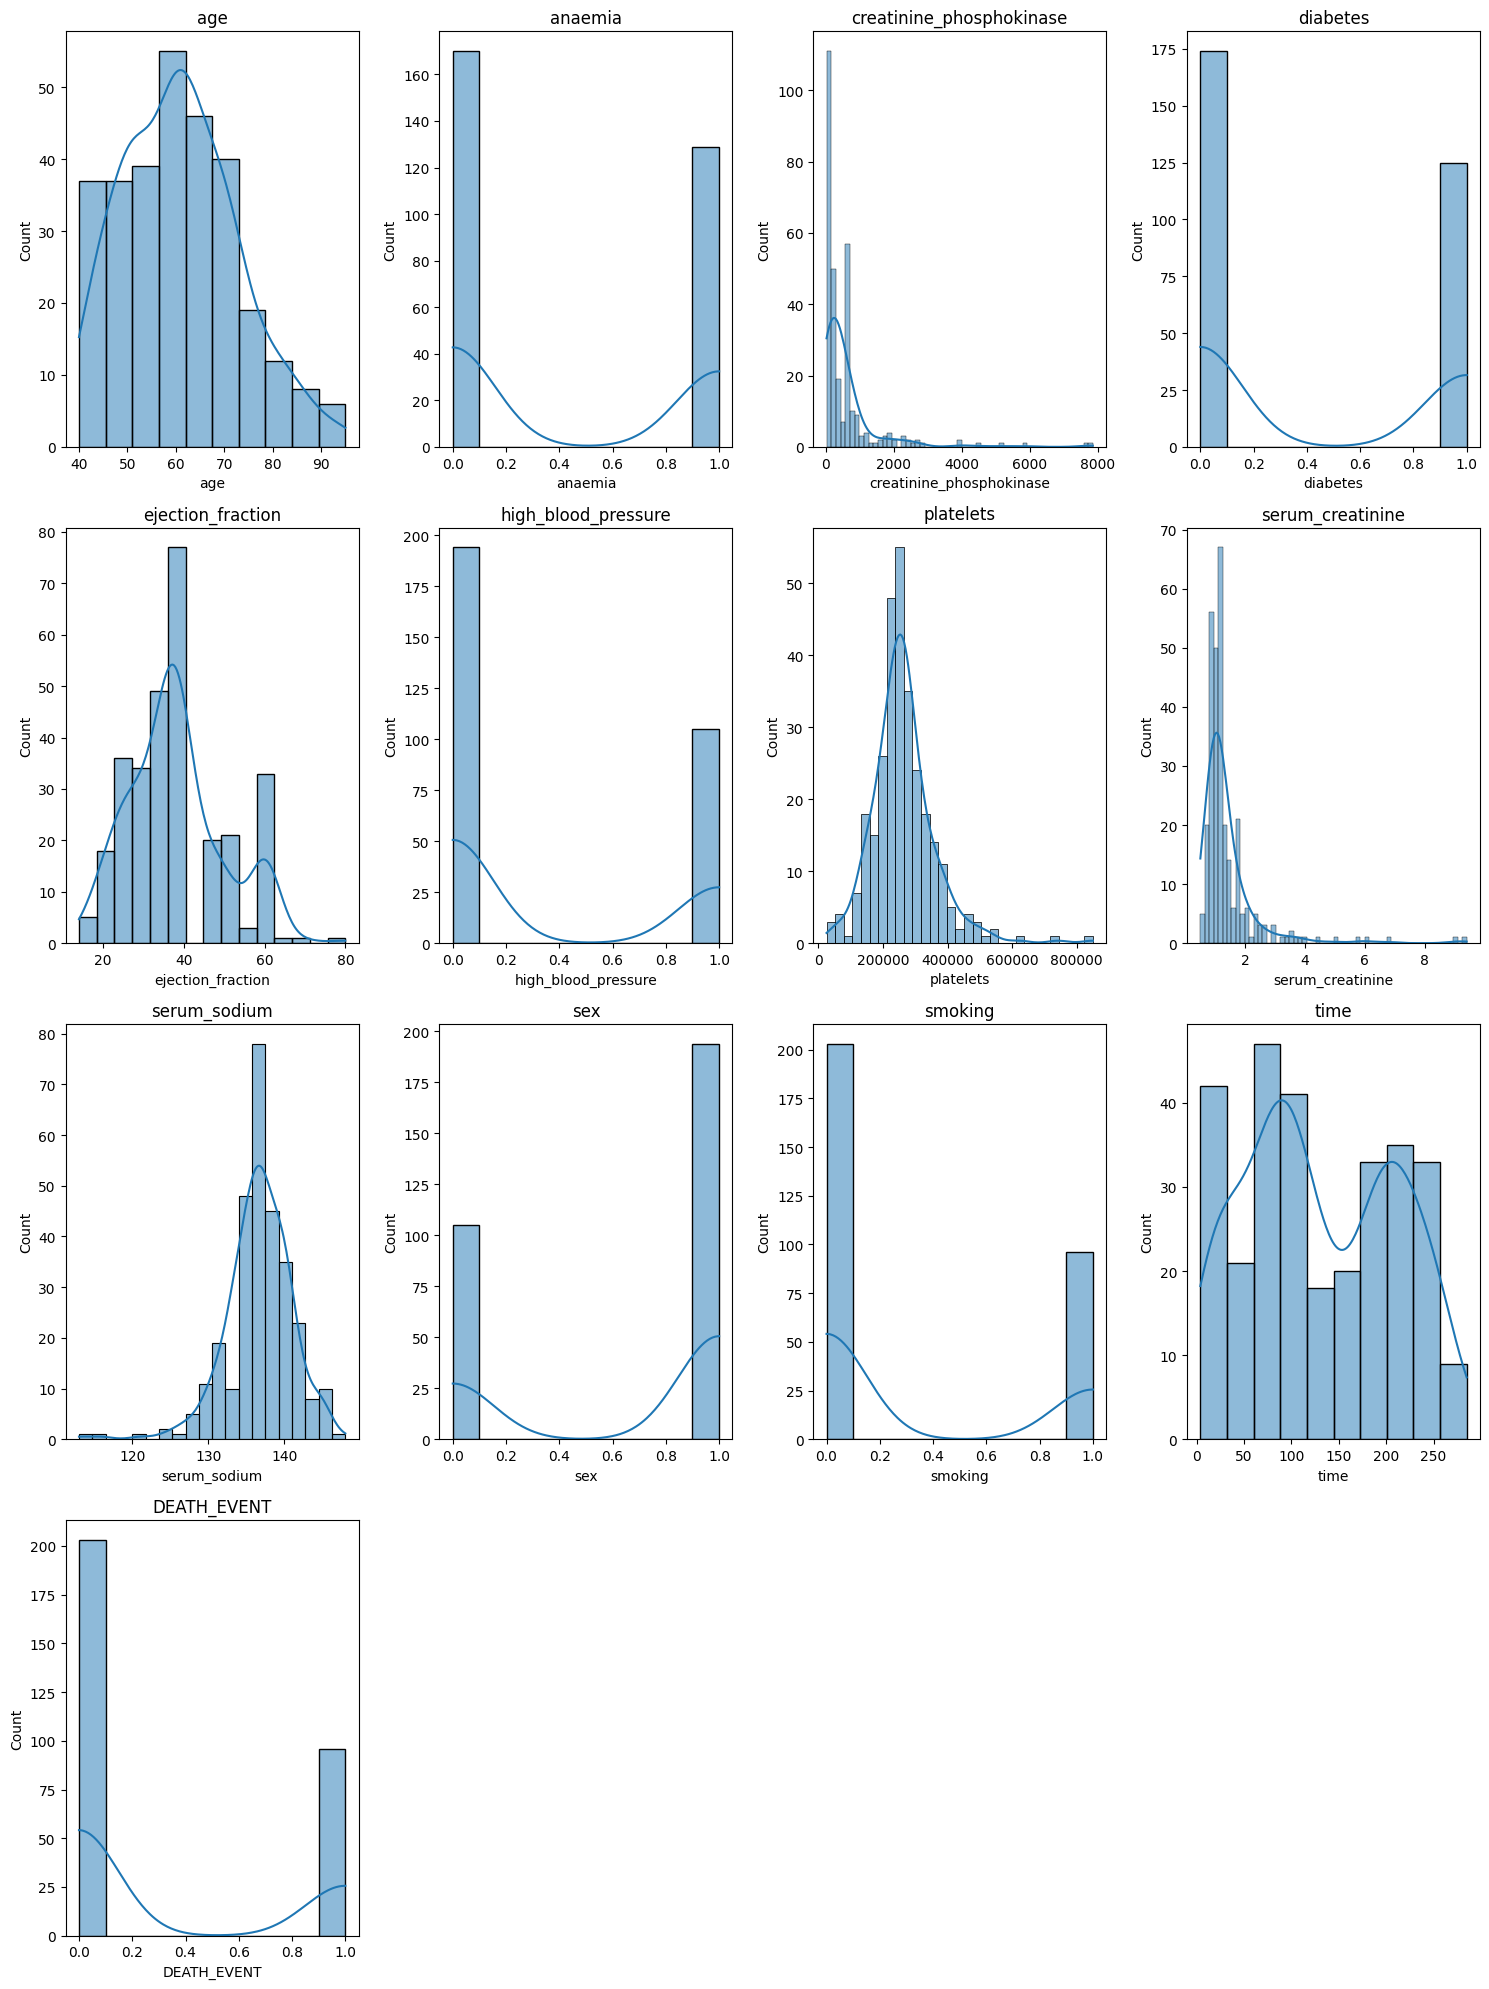

In [ ]:
# Calculate the number of rows and columns for subplot arrangement
num_cols = data.shape[1]
num_rows = (num_cols - 1) // 4 + 1

# Visualisasi distribusi setiap kolom
plt.figure(figsize=(15, 5*num_rows))
for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

Kode di atas digunakan untuk membuat visualisasi distribusi untuk setiap kolom dalam dataset menggunakan histogram. Setiap kolom akan ditampilkan dalam subplot yang diatur secara dinamis berdasarkan jumlah kolom dalam dataset.

Berikut penjelasan singkat tentang kode tersebut:

- num_cols = data.shape[1]: Variabel num_cols dihitung untuk menyimpan jumlah kolom dalam dataset.
- num_rows = (num_cols - 1) // 4 + 1: Variabel num_rows dihitung untuk menentukan jumlah baris subplot yang diperlukan. Setiap baris memiliki 4 subplot, sehingga jumlah baris dihitung berdasarkan jumlah kolom.
- plt.figure(figsize=(15, 5*num_rows)): Membuat objek gambar dengan ukuran yang disesuaikan berdasarkan jumlah baris subplot yang dihasilkan.
- Iterasi melalui setiap kolom dalam dataset menggunakan enumerate(data.columns, 1).
- Untuk setiap kolom, subplot dibuat dengan menggunakan plt.subplot(num_rows, 4, i), di mana num_rows adalah jumlah baris subplot, 4 adalah jumlah kolom subplot dalam satu baris, dan i adalah indeks subplot saat ini.
- sns.histplot(data[column], kde=True): Menggunakan sns.histplot() dari library Seaborn untuk membuat histogram dari nilai dalam kolom.
- plt.title(column): Menambahkan judul subplot sesuai dengan nama kolom.
- plt.tight_layout(): Mengatur layout subplot agar lebih rapi.
- plt.show(): Menampilkan plot histogram.

Dengan kode ini, Anda dapat dengan cepat melihat distribusi dari setiap kolom dalam dataset Anda.

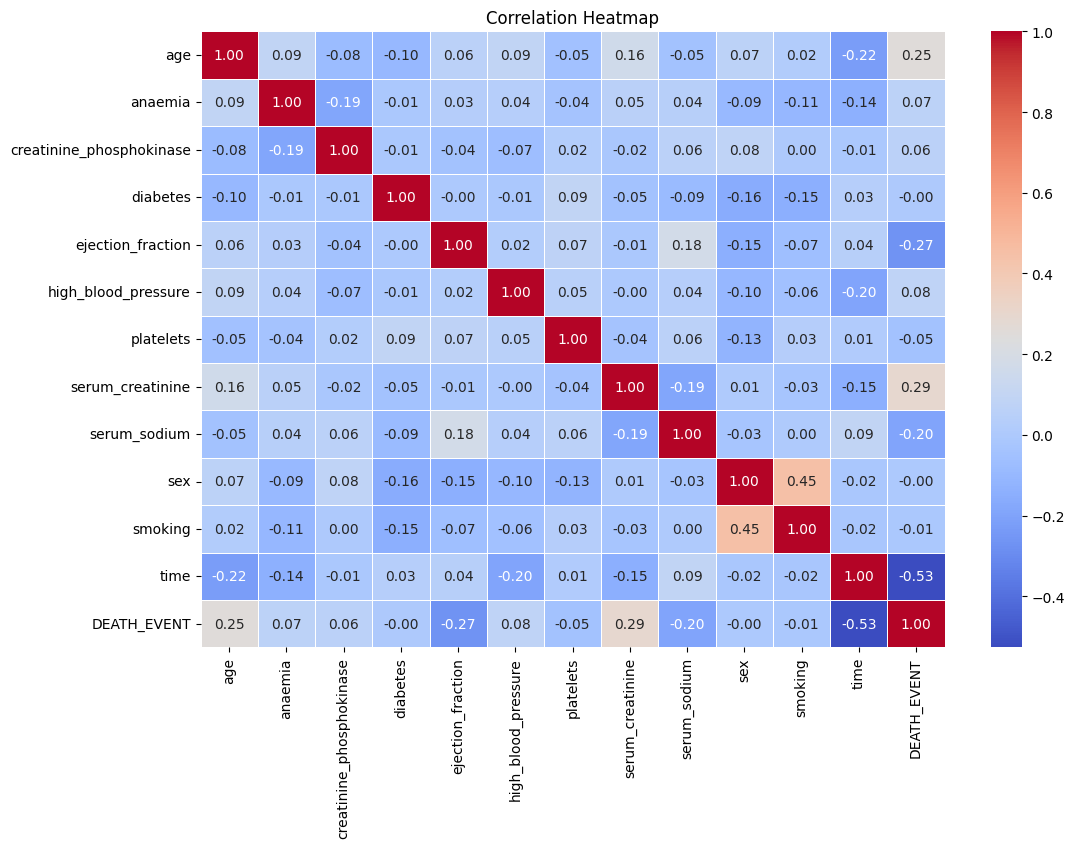

In [ ]:
# Hitung korelasi antar fitur
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Kode di atas digunakan untuk menghitung korelasi antar fitur dalam dataset dan kemudian menampilkan heatmap dari matriks korelasi tersebut.

Berikut penjelasan singkat tentang kode tersebut:

- correlation_matrix = data.corr(): Menggunakan metode corr() dari Pandas DataFrame untuk menghitung korelasi antar fitur dalam dataset. Ini akan menghasilkan matriks korelasi antar kolom.
- plt.figure(figsize=(12, 8)): Membuat objek gambar dengan ukuran yang disesuaikan untuk heatmap.
- sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5): Menggunakan sns.heatmap() dari library Seaborn untuk membuat heatmap dari matriks korelasi. annot=True digunakan untuk menampilkan nilai korelasi di dalam setiap sel heatmap. cmap='coolwarm' digunakan untuk memilih skema warna untuk heatmap. fmt=".2f" digunakan untuk menentukan format angka desimal. linewidths=0.5 digunakan untuk menentukan ketebalan garis pembatas antar sel.
- plt.title('Correlation Heatmap'): Menambahkan judul untuk heatmap.
- plt.show(): Menampilkan heatmap.

Dengan heatmap korelasi ini, Anda dapat dengan cepat melihat hubungan antara fitur-fitur dalam dataset. Warna dan nilai korelasi akan memberikan informasi tentang seberapa kuat hubungan antara setiap pasang fitur.

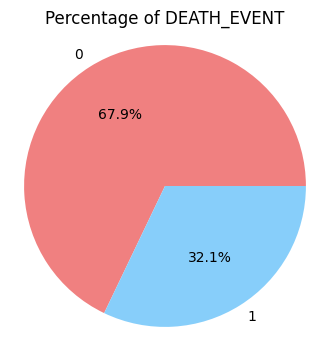

In [ ]:
# Hitung jumlah DEATH_EVENT
death_counts = data['DEATH_EVENT'].value_counts()

# Buat pie chart
plt.figure(figsize=(4, 4))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Percentage of DEATH_EVENT')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Kemudian, fokus dialihkan ke fitur target, yaitu DEATH_EVENT. Jumlah DEATH_EVENT yang terjadi dalam dataset dihitung dan direpresentasikan dalam bentuk pie chart. Dengan pie chart ini, kita dapat dengan jelas melihat persentase dari kategori DEATH_EVENT, yang merupakan langkah awal dalam pemahaman distribusi kelas target.

Dengan melakukan serangkaian analisis ini, kita dapat memahami lebih dalam tentang struktur dan karakteristik dataset, serta mendapatkan wawasan awal tentang hubungan antar fitur dan distribusi dari target yang ingin diprediksi. Analisis ini menjadi langkah awal yang penting dalam mempersiapkan dataset untuk pemodelan dan prediksi menggunakan teknik machine learning.

# Evaluasi Data

In [ ]:
# Persiapan data untuk pemodelan
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dalam langkah persiapan data untuk pemodelan, kita memisahkan data menjadi fitur (X) dan target (y). Fitur (X) adalah semua kolom kecuali kolom 'DEATH_EVENT', sementara target (y) adalah kolom 'DEATH_EVENT' itu sendiri.

Setelah memisahkan fitur dan target, dataset dibagi menjadi data latih (train) dan data uji (test) menggunakan metode train_test_split dari library scikit-learn. Dalam kasus ini, kita menggunakan proporsi 80:20, di mana 80% data digunakan untuk melatih model dan 20% digunakan untuk menguji kinerja model.

Proses ini memastikan bahwa kita memiliki data yang independen untuk melatih dan menguji model, sehingga memungkinkan kita untuk mengevaluasi kinerja model dengan baik. Selain itu, penggunaan parameter 'random_state' dengan nilai tertentu (dalam hal ini 42) memastikan bahwa pembagian data menjadi data latih dan data uji dilakukan secara konsisten, sehingga memungkinkan hasil yang dapat direproduksi dalam pembangunan model.

In [ ]:
# Membuat dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')


Kode di atas digunakan untuk membuat dan melatih model Support Vector Machine (SVM) dengan menggunakan kernel linear.

Penjelasan singkat tentang kode tersebut:

- svm_model = SVC(kernel='linear'): Membuat objek model SVM dengan menggunakan kelas SVC dari library scikit-learn. Parameter kernel='linear' menentukan bahwa model akan menggunakan kernel linear.
- svm_model.fit(X_train, y_train): Melatih model SVM menggunakan data latih (X_train dan y_train) yang telah dipersiapkan sebelumnya. Proses pelatihan dilakukan dengan mempelajari hubungan antara fitur dan label dalam data latih, sehingga model dapat membuat prediksi yang baik pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Melakukan prediksi
y_pred = svm_model.predict(X_test)

Dalam langkah ini, dilakukan prediksi menggunakan model SVM yang telah dilatih sebelumnya pada data uji (X_test). Prediksi dilakukan untuk mengetahui label yang diprediksi oleh model untuk setiap sampel dalam data uji.

Hasil prediksi disimpan dalam variabel y_pred, yang akan digunakan untuk evaluasi kinerja model pada langkah selanjutnya. Dengan melakukan prediksi ini, kita dapat mengukur seberapa baik model SVM dapat mengeneralisasi dan melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[32  3]
 [12 13]]


Dalam output di atas, kita memiliki:

- 32 True Negatives (TN): Sampel yang seharusnya bernilai negatif dan diprediksi benar sebagai negatif.
- 3 False Positives (FP): Sampel yang seharusnya bernilai negatif, tetapi diprediksi salah sebagai positif.
- 12 False Negatives (FN): Sampel yang seharusnya bernilai positif, tetapi diprediksi salah sebagai negatif.
- 13 True Positives (TP): Sampel yang seharusnya bernilai positif dan diprediksi benar sebagai positif.

Dengan menggunakan confusion matrix, kita dapat menghitung berbagai metrik evaluasi kinerja model seperti akurasi, presisi, recall, dan lainnya.

In [ ]:
# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



Laporan klasifikasi adalah ringkasan yang berguna untuk mengevaluasi kinerja model klasifikasi pada set data uji. Laporan ini mencakup beberapa metrik evaluasi utama, termasuk presisi, recall, dan nilai F1 untuk setiap kelas, serta akurasi dan rata-rata harmonik dari metrik-metrik tersebut.

- Precision: Proporsi dari hasil positif yang benar-benar positif dari semua hasil positif yang diprediksi oleh model. Dalam kasus ini, precision untuk kelas 0 adalah 0.73, dan untuk kelas 1 adalah 0.81.
- Recall: Proporsi dari semua sampel positif yang berhasil diprediksi dengan benar oleh model. Dalam kasus ini, recall untuk kelas 0 adalah 0.91, dan untuk kelas 1 adalah 0.52.
- F1-score: Rata-rata harmonik dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. Dalam kasus ini, F1-score untuk kelas 0 adalah 0.81, dan untuk kelas 1 adalah 0.63.
- Support: Jumlah sampel dalam set data uji yang termasuk dalam setiap kelas.
- Accuracy: Proporsi dari semua prediksi yang benar yang dilakukan oleh model. Dalam kasus ini, akurasi adalah 0.75.
- Macro avg: Rata-rata dari metrik-metrik untuk setiap kelas. Dalam kasus ini, rata-rata presisi, recall, dan F1-score untuk semua kelas.
- Weighted avg: Rata-rata dari metrik-metrik untuk setiap kelas, dengan bobot yang diberikan oleh jumlah sampel dalam setiap kelas. Dalam kasus ini, rata-rata presisi, recall, dan F1-score untuk semua kelas, dengan bobot yang sesuai dengan jumlah sampel dalam setiap kelas.

In [ ]:
# Hitung dan tampilkan accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


Hasilnya menunjukkan bahwa model kita memiliki akurasi sebesar 0.75, yang berarti model tersebut dapat membuat prediksi yang benar sekitar 75% dari seluruh prediksi yang dilakukan. Akurasi yang lebih tinggi menunjukkan kinerja model yang lebih baik dalam melakukan prediksi. Namun, akurasi sendiri tidak memberikan gambaran lengkap tentang kinerja model, terutama jika terdapat ketidakseimbangan kelas dalam dataset. Oleh karena itu, selalu disarankan untuk memeriksa metrik evaluasi lainnya juga, seperti presisi, recall, dan F1-score.